In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [12]:
variant_mapping = {
    "Wuhan": "Wuhan-A",
    "A": "Alpha-B.1.1.7",
    "B": "Beta-B.1.351",
    "D": "Delta-B.1.617.2",
    "G": "Gamma-P.1",
    "O1": "Omicron-BA.1",
    "O2": "Omicron-BA.1.1",
    "O3": "Omicron-BA.2.12.1",
    "O4": "Omicron-BA.5.2.1",
}

binding_scores = pd.read_csv("mutation/binding-affinity.csv")
binding_scores["variant"] = binding_scores["Protein -protein complex"].str.split("-").str[0].map(variant_mapping)
binding_scores = binding_scores[["variant", "Binding affinity"]].groupby("variant").min().reset_index().set_index("variant")
binding_scores = binding_scores["Binding affinity"]

data = pd.read_csv("mutation/mutation-all.csv")
for var in data['variant'].unique():
    data["Against " + var] = data["variant"].map(binding_scores).apply(
        lambda x: 0 if x == binding_scores[var] else (1 if x > binding_scores[var] else -1)
    )
data

,sequence,variant,D614G,N856S,G1124V,T19R,T95I,G142D,E156G,F157-,...,N969K,L981F,A243S,A829T,Against Beta-B.1.351,Against Delta-B.1.617.2,Against Gamma-P.1,Against Omicron-BA.1.1,Against Omicron-BA.1,Against Wuhan-A
0,Beta-B.1.351-S1,Beta-B.1.351,1,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,-1,-1
1,Beta-B.1.351-S2,Beta-B.1.351,1,1,1,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,-1,-1
2,Beta-B.1.351-S3,Beta-B.1.351,1,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,-1,-1
3,Beta-B.1.351-S4,Beta-B.1.351,1,1,1,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,-1,-1
4,Beta-B.1.351-S5,Beta-B.1.351,1,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,-1,-1
5,Beta-B.1.351-S6,Beta-B.1.351,1,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,-1,-1
6,Beta-B.1.351-S7,Beta-B.1.351,1,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,-1,-1
7,Beta-B.1.351-S8,Beta-B.1.351,1,1,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,-1,-1
8,Delta-B.1.617.2-S1,Delta-B.1.617.2,1,0,0,1,1,1,0,0,...,0,0,0,0,1,0,-1,1,1,-1
9,Delta-B.1.617.2-S2,Delta-B.1.617.2,1,0,0,1,0,0,1,1,...,0,0,0,0,1,0,-1,1,1,-1


In [13]:
ca_distances = pd.read_csv("tmalign/residue_distances_by_sequence.csv")
df = data.merge(ca_distances, on="sequence", how="left")
df = df.dropna()

In [14]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report

class AffinityPredictor(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(1024, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 2)  # 2 classes: -1, 1
        )
        
    def forward(self, x):
        return self.model(x)

def convert_to_classes(y):
    """Convert -1, 1 to class indices 0, 1"""
    return (y + 1) // 2  # -1->0, 1->1

def convert_from_classes(class_indices):
    """Convert class indices 0, 1 back to -1, 1"""
    return class_indices * 2 - 1  # 0->-1, 1->1

def train_single_model(X_train, y_train, X_test, y_test, epochs=100):
    # Filter out rows where y == 0
    train_mask = y_train != 0
    test_mask = y_test != 0
    
    X_train_filtered = X_train[train_mask]
    y_train_filtered = y_train[train_mask]
    X_test_filtered = X_test[test_mask]
    y_test_filtered = y_test[test_mask]
    
    # Convert targets to class indices
    y_train_classes = convert_to_classes(y_train_filtered)
    y_test_classes = convert_to_classes(y_test_filtered)
    
    X_train_tensor = torch.tensor(X_train_filtered, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_classes, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test_filtered, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test_classes, dtype=torch.long)
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    
    model = AffinityPredictor(input_size=X_train_filtered.shape[1])
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
    model.train()
    for epoch in range(epochs):
        for batch_x, batch_y in train_loader:
            pred = model(batch_x)
            loss = criterion(pred, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    model.eval()
    with torch.no_grad():
        # Training predictions
        train_logits = model(X_train_tensor)
        train_pred_classes = torch.argmax(train_logits, dim=1)
        train_accuracy = (train_pred_classes == y_train_tensor).float().mean().item()
        
        # Test predictions
        test_logits = model(X_test_tensor)
        test_pred_classes = torch.argmax(test_logits, dim=1)
        test_accuracy = (test_pred_classes == y_test_tensor).float().mean().item()
        
        # Convert back to original labels for detailed metrics
        train_pred_original = convert_from_classes(train_pred_classes.numpy())
        test_pred_original = convert_from_classes(test_pred_classes.numpy())
    print(y_test_filtered, test_pred_original)
    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'test_predictions': test_pred_original,
        'test_actual': y_test_filtered,
        'n_train_samples': len(y_train_filtered),
        'n_test_samples': len(y_test_filtered)
    }

In [15]:
ORDER = ["Wuhan-A", "Beta-B.1.351", "Alpha-B.1.1.7", "Gamma-P.1", "Omicron-BA.1", "Delta-B.1.617.2", "Omicron-BA.2.12.1", "Omicron-BA.5.2.1", "Omicron-BA.1.1"]

In [16]:
# Dictionary to store mean differences for heatmap
heatmap_data = {}

for validation in ORDER:
    VALIDATION_VARIANT = validation
    if VALIDATION_VARIANT not in df["variant"].unique():
        continue
    X = df.drop(columns=["sequence", "variant"] + ["Against " + var for var in df['variant'].unique()]).values.astype(float)
    y = df["Against " + VALIDATION_VARIANT].values.astype(float)

    for var in df["variant"].unique():
        if var == VALIDATION_VARIANT:
            continue
        mask = (df["variant"] == VALIDATION_VARIANT) | (df["variant"] == var)
        # Split based on the mask
        X_train = X[~mask]
        y_train = y[~mask]
        X_test = X[mask]
        y_test = y[mask]
        print(f"Processing {VALIDATION_VARIANT} vs {var}: {X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}")

        # Train multiple models and collect metrics
        n_runs = 5  # Increase runs for better statistics
        results = []
        mean_differences = []
        
        for i in range(n_runs):
            result = train_single_model(X_train, y_train, X_test, y_test)
            results.append(result)
            
            # Calculate mean absolute difference between predictions and actual values
            if len(result['test_predictions']) > 0:
                mean_diff = np.mean(np.abs(result['test_predictions'] - result['test_actual']))
                mean_differences.append(mean_diff)
            
            if (i + 1) % 10 == 0:
                print(f"  Completed {i + 1}/{n_runs} runs")
        
        # Store the average mean difference for this pair
        if mean_differences:
            avg_mean_diff = np.mean(mean_differences)
            heatmap_data[(VALIDATION_VARIANT, var)] = avg_mean_diff
            print(f"  Average mean difference: {avg_mean_diff:.4f}")
        else:
            print(f"  No valid predictions for {VALIDATION_VARIANT} vs {var}")

print("\\nCompleted all training runs. Creating heatmap...")



Processing Wuhan-A vs Beta-B.1.351: (32, 168), (32,), (16, 168), (16,)
[-1. -1. -1. -1. -1. -1. -1. -1.] [1 1 1 1 1 1 1 1]
[-1. -1. -1. -1. -1. -1. -1. -1.] [-1 -1 -1 -1 -1 -1 -1 -1]
[-1. -1. -1. -1. -1. -1. -1. -1.] [-1 -1 -1 -1 -1 -1 -1 -1]
[-1. -1. -1. -1. -1. -1. -1. -1.] [ 1  1  1  1  1  1 -1  1]
[-1. -1. -1. -1. -1. -1. -1. -1.] [1 1 1 1 1 1 1 1]
  Average mean difference: 1.1500
Processing Wuhan-A vs Delta-B.1.617.2: (32, 168), (32,), (16, 168), (16,)
[-1. -1. -1. -1. -1. -1. -1. -1.] [-1 -1 -1 -1 -1 -1 -1 -1]
[-1. -1. -1. -1. -1. -1. -1. -1.] [-1 -1 -1 -1 -1 -1 -1 -1]
[-1. -1. -1. -1. -1. -1. -1. -1.] [-1 -1 -1 -1 -1 -1 -1 -1]
[-1. -1. -1. -1. -1. -1. -1. -1.] [-1 -1 -1 -1 -1 -1 -1 -1]
[-1. -1. -1. -1. -1. -1. -1. -1.] [-1 -1 -1 -1 -1 -1 -1 -1]
  Average mean difference: 0.0000
Processing Wuhan-A vs Gamma-P.1: (32, 168), (32,), (16, 168), (16,)
[1. 1. 1. 1. 1. 1. 1. 1.] [-1 -1 -1 -1 -1 -1 -1 -1]
[1. 1. 1. 1. 1. 1. 1. 1.] [-1 -1 -1 -1 -1 -1 -1 -1]
[1. 1. 1. 1. 1. 1. 1. 1.] [-1 -

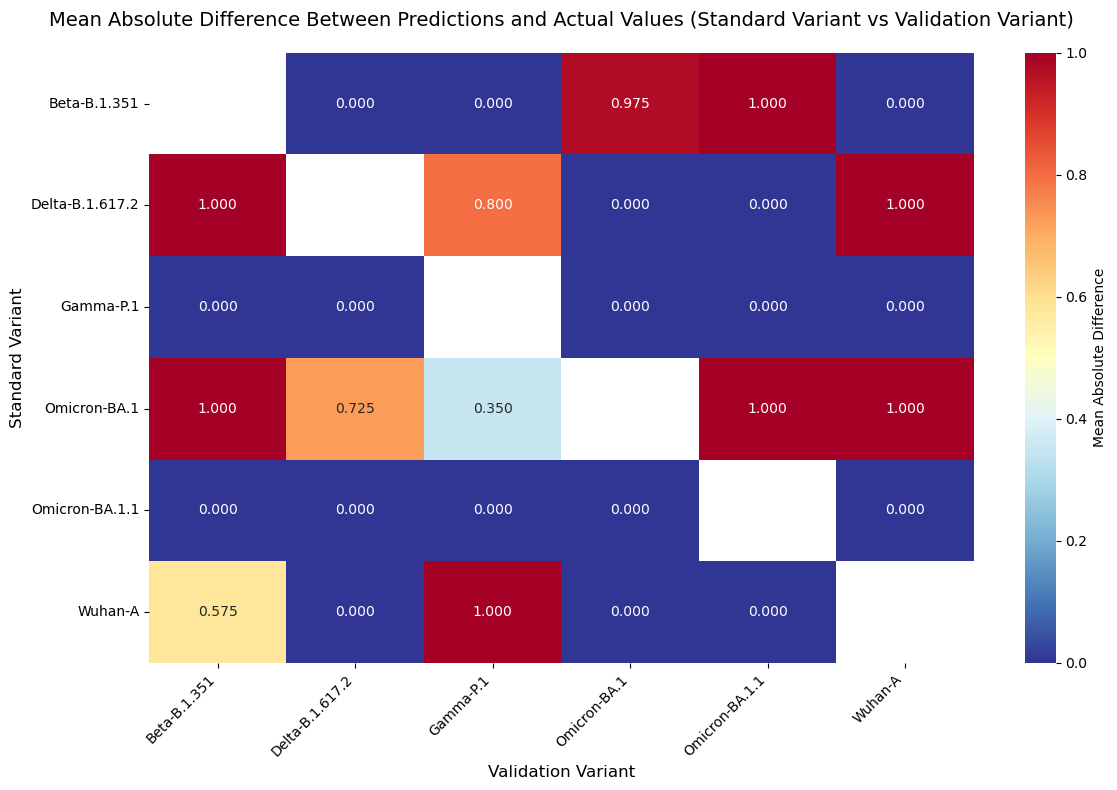

\nHEATMAP SUMMARY:
Beta-B.1.351 vs Delta-B.1.617.2: 0.0000
Beta-B.1.351 vs Gamma-P.1: 0.0000
Beta-B.1.351 vs Omicron-BA.1: 1.9500
Beta-B.1.351 vs Omicron-BA.1.1: 2.0000
Beta-B.1.351 vs Wuhan-A: 0.0000
Delta-B.1.617.2 vs Beta-B.1.351: 2.0000
Delta-B.1.617.2 vs Gamma-P.1: 1.6000
Delta-B.1.617.2 vs Omicron-BA.1: 0.0000
Delta-B.1.617.2 vs Omicron-BA.1.1: 0.0000
Delta-B.1.617.2 vs Wuhan-A: 2.0000
Gamma-P.1 vs Beta-B.1.351: 0.0000
Gamma-P.1 vs Delta-B.1.617.2: 0.0000
Gamma-P.1 vs Omicron-BA.1: 0.0000
Gamma-P.1 vs Omicron-BA.1.1: 0.0000
Gamma-P.1 vs Wuhan-A: 0.0000
Omicron-BA.1 vs Beta-B.1.351: 2.0000
Omicron-BA.1 vs Delta-B.1.617.2: 1.4500
Omicron-BA.1 vs Gamma-P.1: 0.7000
Omicron-BA.1 vs Omicron-BA.1.1: 2.0000
Omicron-BA.1 vs Wuhan-A: 2.0000
Omicron-BA.1.1 vs Beta-B.1.351: 0.0000
Omicron-BA.1.1 vs Delta-B.1.617.2: 0.0000
Omicron-BA.1.1 vs Gamma-P.1: 0.0000
Omicron-BA.1.1 vs Omicron-BA.1: 0.0000
Omicron-BA.1.1 vs Wuhan-A: 0.0000
Wuhan-A vs Beta-B.1.351: 1.1500
Wuhan-A vs Delta-B.1.617.2: 0.0

In [17]:
# Create heatmap data structure
validation_variants = sorted([v for v in ORDER if v in df["variant"].unique()])
comparison_variants = sorted(df["variant"].unique())

# Create matrix for heatmap
heatmap_matrix = np.full((len(validation_variants), len(comparison_variants)), np.nan)
for i, val_var in enumerate(validation_variants):
    for j, comp_var in enumerate(comparison_variants):
        if (val_var, comp_var) in heatmap_data:
            heatmap_matrix[i, j] = heatmap_data[(val_var, comp_var)] / 2

# Create the heatmap
plt.figure(figsize=(12, 8))
import seaborn as sns

# Create heatmap with custom colormap
sns.heatmap(heatmap_matrix, 
            xticklabels=comparison_variants,
            yticklabels=validation_variants,
            annot=True, 
            fmt='.3f',
            cmap='RdYlBu_r',  # Red for high differences, blue for low
            cbar_kws={'label': 'Mean Absolute Difference'},
            mask=np.isnan(heatmap_matrix))

plt.title('Mean Absolute Difference Between Predictions and Actual Values (Standard Variant vs Validation Variant)', fontsize=14, pad=20)
plt.xlabel('Validation Variant', fontsize=12)
plt.ylabel('Standard Variant', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\\nHEATMAP SUMMARY:")
print("=" * 50)
for (val_var, comp_var), mean_diff in sorted(heatmap_data.items()):
    print(f"{val_var} vs {comp_var}: {mean_diff:.4f}")


In [16]:
titer_ranking = {
    "Wuhan-A": 1,
    "Beta-B.1.351": 2,
    "Delta-B.1.617.2": 3,
    "Omicron-BA.1": 4,
}

def map_titer_ranking(x):
    if x not in titer_ranking.keys():
        print(x, var)
        return None
    return 1 if titer_ranking[x] > titer_ranking[var] else (0 if titer_ranking[x] == titer_ranking[var] else -1)

for var in titer_ranking.keys():
    data["Against Titer " + var] = data["variant"].map(map_titer_ranking)

df = data.dropna()

Gamma-P.1 Wuhan-A
Gamma-P.1 Wuhan-A
Gamma-P.1 Wuhan-A
Gamma-P.1 Wuhan-A
Gamma-P.1 Wuhan-A
Gamma-P.1 Wuhan-A
Gamma-P.1 Wuhan-A
Gamma-P.1 Wuhan-A
Omicron-BA.1.1 Wuhan-A
Omicron-BA.1.1 Wuhan-A
Omicron-BA.1.1 Wuhan-A
Omicron-BA.1.1 Wuhan-A
Omicron-BA.1.1 Wuhan-A
Omicron-BA.1.1 Wuhan-A
Omicron-BA.1.1 Wuhan-A
Omicron-BA.1.1 Wuhan-A
Gamma-P.1 Beta-B.1.351
Gamma-P.1 Beta-B.1.351
Gamma-P.1 Beta-B.1.351
Gamma-P.1 Beta-B.1.351
Gamma-P.1 Beta-B.1.351
Gamma-P.1 Beta-B.1.351
Gamma-P.1 Beta-B.1.351
Gamma-P.1 Beta-B.1.351
Omicron-BA.1.1 Beta-B.1.351
Omicron-BA.1.1 Beta-B.1.351
Omicron-BA.1.1 Beta-B.1.351
Omicron-BA.1.1 Beta-B.1.351
Omicron-BA.1.1 Beta-B.1.351
Omicron-BA.1.1 Beta-B.1.351
Omicron-BA.1.1 Beta-B.1.351
Omicron-BA.1.1 Beta-B.1.351
Gamma-P.1 Delta-B.1.617.2
Gamma-P.1 Delta-B.1.617.2
Gamma-P.1 Delta-B.1.617.2
Gamma-P.1 Delta-B.1.617.2
Gamma-P.1 Delta-B.1.617.2
Gamma-P.1 Delta-B.1.617.2
Gamma-P.1 Delta-B.1.617.2
Gamma-P.1 Delta-B.1.617.2
Omicron-BA.1.1 Delta-B.1.617.2
Omicron-BA.1.1 Delta-B.1.

In [17]:
data[["variant", "Against Titer Wuhan-A", "Against Titer Beta-B.1.351", "Against Titer Delta-B.1.617.2", "Against Titer Omicron-BA.1"]].groupby("variant").mean()

,Against Titer Wuhan-A,Against Titer Beta-B.1.351,Against Titer Delta-B.1.617.2,Against Titer Omicron-BA.1
variant,,,,
Beta-B.1.351,1.0,0.0,-1.0,-1.0
Delta-B.1.617.2,1.0,1.0,0.0,-1.0
Gamma-P.1,NaN,NaN,NaN,NaN
Omicron-BA.1,1.0,1.0,1.0,0.0
Omicron-BA.1.1,NaN,NaN,NaN,NaN
Wuhan-A,0.0,-1.0,-1.0,-1.0


In [9]:
# Dictionary to store mean differences for heatmap
heatmap_data = {}

for validation in ORDER:
    VALIDATION_VARIANT = validation
    if VALIDATION_VARIANT not in df["variant"].unique():
        continue
    X = df.drop(columns=["sequence", "variant"] + ["Against Titer " + var for var in titer_ranking.keys()]).values.astype(float)
    y = df["Against Titer " + VALIDATION_VARIANT].values.astype(float)

    for var in df["variant"].unique():
        if var == VALIDATION_VARIANT:
            continue
        mask = (df["variant"] == VALIDATION_VARIANT) | (df["variant"] == var)
        # Split based on the mask
        X_train = X[~mask]
        y_train = y[~mask]
        X_test = X[mask]
        y_test = y[mask]
        print(f"Processing {VALIDATION_VARIANT} vs {var}: {X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}")

        # Train multiple models and collect metrics
        n_runs = 5  # Increase runs for better statistics
        results = []
        mean_differences = []
        
        for i in range(n_runs):
            result = train_single_model(X_train, y_train, X_test, y_test)
            results.append(result)
            
            # Calculate mean absolute difference between predictions and actual values
            if len(result['test_predictions']) > 0:
                mean_diff = np.mean(np.abs(result['test_predictions'] - result['test_actual']))
                mean_differences.append(mean_diff)
            
            if (i + 1) % 10 == 0:
                print(f"  Completed {i + 1}/{n_runs} runs")
        
        # Store the average mean difference for this pair
        if mean_differences:
            avg_mean_diff = np.mean(mean_differences)
            heatmap_data[(VALIDATION_VARIANT, var)] = avg_mean_diff
            print(f"  Average mean difference: {avg_mean_diff:.4f}")
        else:
            print(f"  No valid predictions for {VALIDATION_VARIANT} vs {var}")

print("\\nCompleted all training runs. Creating heatmap...")



Processing Wuhan-A vs Beta-B.1.351: (16, 74), (16,), (16, 74), (16,)
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
  Average mean difference: 0.0000
Processing Wuhan-A vs Delta-B.1.617.2: (16, 74), (16,), (16, 74), (16,)
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
  Average mean difference: 0.0000
Processing Wuhan-A vs Omicron-BA.1: (16, 74), (16,), (16, 74), (16,)
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 1 1]
  Average mean difference: 0.0000
Processing Beta-B.1.351 vs D

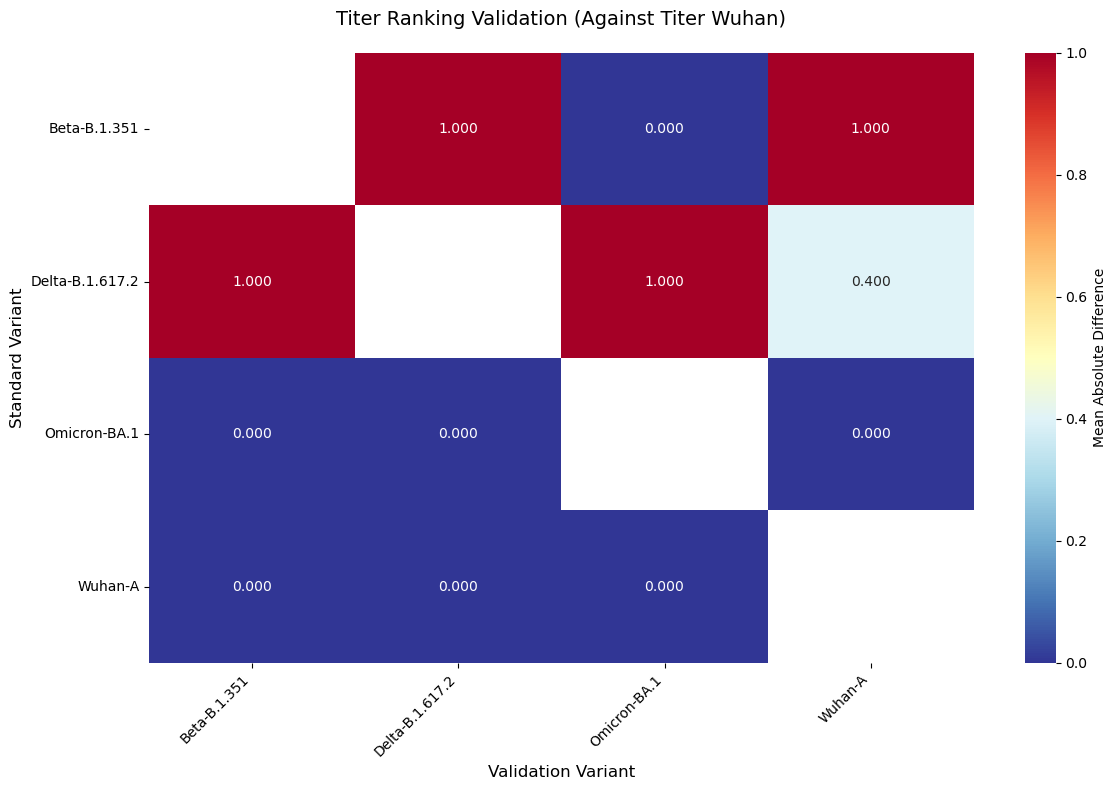

\nHEATMAP SUMMARY:
Beta-B.1.351 vs Delta-B.1.617.2: 2.0000
Beta-B.1.351 vs Omicron-BA.1: 0.0000
Beta-B.1.351 vs Wuhan-A: 2.0000
Delta-B.1.617.2 vs Beta-B.1.351: 2.0000
Delta-B.1.617.2 vs Omicron-BA.1: 2.0000
Delta-B.1.617.2 vs Wuhan-A: 0.8000
Omicron-BA.1 vs Beta-B.1.351: 0.0000
Omicron-BA.1 vs Delta-B.1.617.2: 0.0000
Omicron-BA.1 vs Wuhan-A: 0.0000
Wuhan-A vs Beta-B.1.351: 0.0000
Wuhan-A vs Delta-B.1.617.2: 0.0000
Wuhan-A vs Omicron-BA.1: 0.0000


In [10]:
# Create heatmap data structure
validation_variants = sorted([v for v in ORDER if v in df["variant"].unique()])
comparison_variants = sorted(df["variant"].unique())

# Create matrix for heatmap
heatmap_matrix = np.full((len(validation_variants), len(comparison_variants)), np.nan)
for i, val_var in enumerate(validation_variants):
    for j, comp_var in enumerate(comparison_variants):
        if (val_var, comp_var) in heatmap_data:
            heatmap_matrix[i, j] = heatmap_data[(val_var, comp_var)] / 2

# Create the heatmap
plt.figure(figsize=(12, 8))
import seaborn as sns

# Create heatmap with custom colormap
sns.heatmap(heatmap_matrix, 
            xticklabels=comparison_variants,
            yticklabels=validation_variants,
            annot=True, 
            fmt='.3f',
            cmap='RdYlBu_r',  # Red for high differences, blue for low
            cbar_kws={'label': 'Mean Absolute Difference'},
            mask=np.isnan(heatmap_matrix))

plt.title('Titer Ranking Validation (Against Titer Wuhan)', fontsize=14, pad=20)
plt.xlabel('Validation Variant', fontsize=12)
plt.ylabel('Standard Variant', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\\nHEATMAP SUMMARY:")
print("=" * 50)
for (val_var, comp_var), mean_diff in sorted(heatmap_data.items()):
    print(f"{val_var} vs {comp_var}: {mean_diff:.4f}")
